In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '..')

%matplotlib inline
sns.set()

In [3]:
import glob

In [4]:
no_kaf = '../logs/darnn/ntsa-2018-12-21-22-11-49/'
kaf_time = '../logs/darnn/ntsa-2018-12-21-22-12-06/'
kaf_input = '../logs/darnn/ntsa-2018-12-21-22-12-26/'
kaf_dual = '../logs/darnn/ntsa-2018-12-21-22-12-46/'

In [5]:
df_no_kaf = pd.read_csv(no_kaf + 'train/results.csv')
df_kaf_time = pd.read_csv(kaf_time + '/train/results.csv')
df_kaf_input = pd.read_csv(kaf_input + '/train/results.csv')
df_kaf_dual = pd.read_csv(kaf_dual + '/train/results.csv')

In [6]:
def smooth(x,w=0.5):
    p = x[0]
    xs = []
    for d in x:
        p = p * w + (1-w) * d
        xs.append(p)
    return np.array(xs)

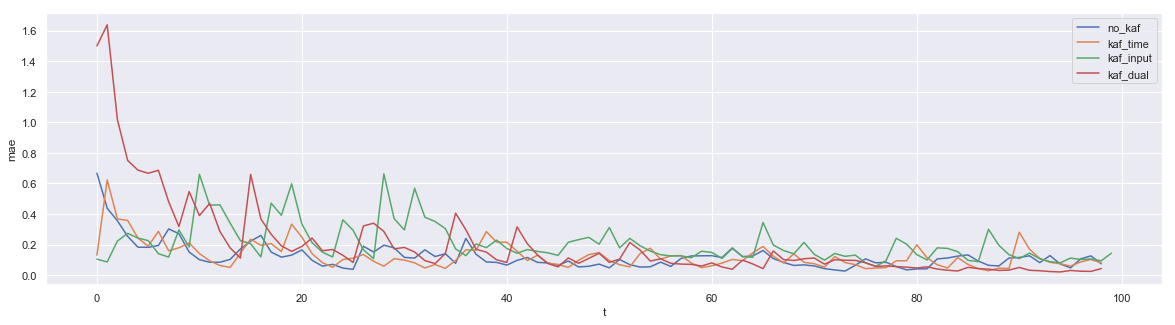

In [7]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

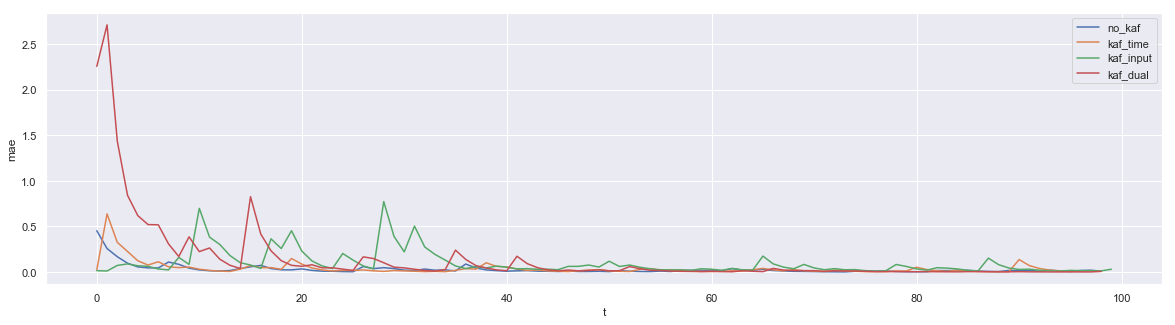

In [8]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.mse.values))
ax.plot(smooth(df_kaf_time.mse.values))
ax.plot(smooth(df_kaf_input.mse.values))
ax.plot(smooth(df_kaf_dual.mse.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [9]:

rows = ['no_kaf','kaf_time','kaf_input', 'kaf_dual']

table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.115461,13.056938,0.024991,0.115461,0.221975,0.115461,388.830638
kaf_time,0.126898,13.463244,0.038266,0.126898,0.193544,0.126898,327.678679
kaf_input,0.206968,7.473527,0.096598,0.206968,0.307344,0.206968,132.177634
kaf_dual,0.186328,12.223527,0.123322,0.186328,0.226149,0.186328,69.714126


In [10]:
header = table.index.tolist()

In [11]:
df_no_kaf = pd.read_csv(no_kaf + 'test/results.csv', names=header)
df_kaf_time = pd.read_csv(kaf_time + '/test/results.csv', names=header)
df_kaf_input = pd.read_csv(kaf_input + '/test/results.csv', names=header)
df_kaf_dual = pd.read_csv(kaf_dual+ '/test/results.csv', names=header)

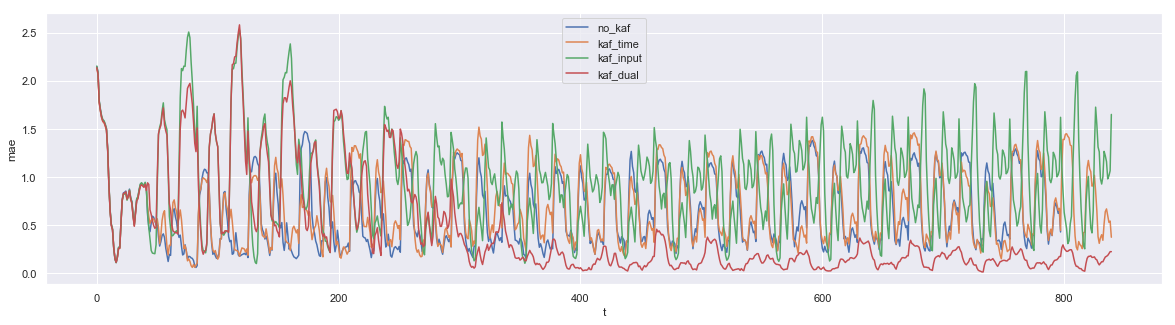

In [12]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [13]:
table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

In [14]:
table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.638958,11.795195,0.610734,0.638958,0.607290,0.638958,244.991872
kaf_time,0.693529,12.060294,0.698234,0.693529,0.632931,0.693529,287.970763
kaf_input,0.959405,8.244803,1.280409,0.959405,1.211161,0.959405,463.631666
kaf_dual,0.450618,13.197115,0.507417,0.450618,0.570517,0.450618,252.431696


In [39]:
def get_last_report(path):
    idx = max(list(map(lambda x: int(x.split('/')[-1].split('_')[0]) ,sorted(glob.glob(path+ 'report/*.csv')))))
    return '/report/'+str(idx) +'_report.csv'

In [40]:
get_last_report(kaf_dual)

'/report/94340_report.csv'

In [41]:
max(list(map(lambda x: int(x.split('/')[-1].split('_')[0]) ,sorted(glob.glob(no_kaf+ 'report/*.csv')))))

94323

In [42]:
df_no_kaf = pd.read_csv(no_kaf + get_last_report(no_kaf), index_col=0)
df_kaf_time = pd.read_csv(kaf_time + get_last_report(kaf_time), index_col=0)
df_kaf_input = pd.read_csv(kaf_input + get_last_report(kaf_input), index_col=0)
df_kaf_dual = pd.read_csv(kaf_dual + get_last_report(kaf_dual), index_col=0)

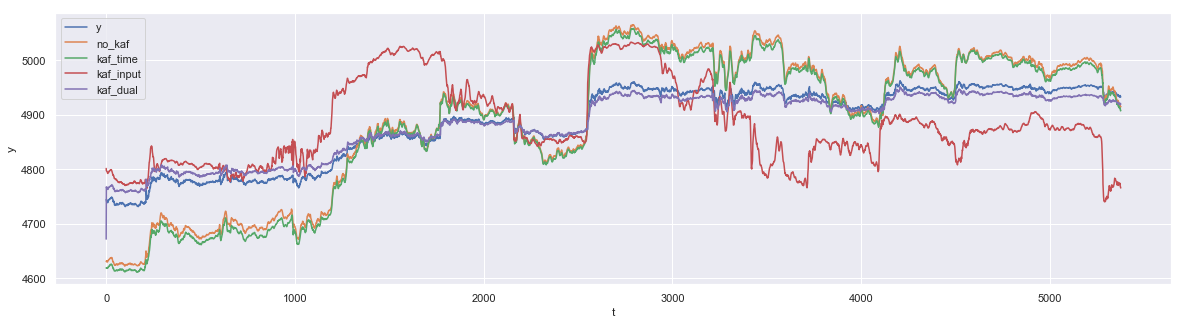

In [44]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(df_no_kaf.y.values)
ax.plot(df_no_kaf.y_hat.values)
ax.plot(df_kaf_time.y_hat.values)
ax.plot(df_kaf_input.y_hat.values)
ax.plot(df_kaf_dual.y_hat.values)
plt.ylabel('y')
plt.xlabel('t')
plt.legend(['y','no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [45]:
from ntsa.utils.misc import regr_metrics

In [46]:
y = df_no_kaf.y.values
y_no_kaf = df_no_kaf.y_hat.values
y_kaf_time = df_kaf_time.y_hat.values
y_kaf_input = df_kaf_input.y_hat.values
y_kaf_dual = df_kaf_dual.y_hat.values

In [47]:
metrics = [
list(regr_metrics(y, y_no_kaf).values()),
list(regr_metrics(y, y_kaf_time).values()),
list(regr_metrics(y, y_kaf_input).values()),
list(regr_metrics(y, y_kaf_dual).values())
]

In [48]:
pd.DataFrame(np.array(metrics), index=['no_kaf', 'time', 'input', 'dual'], columns=['mse', 'mae', 'smape', 'mape'])

,mse,mae,smape,mape
no_kaf,3828.856179,52.940996,0.010870,1.087272
time,3975.212913,52.751362,0.010871,1.089352
input,6634.574890,67.695349,0.013827,1.383474
dual,154.641336,10.873038,0.002231,0.223139
